# 正态分布

正态分布（normal distribution）又名高斯分布（Gaussian distribution）、正规分布，是一个非常常见的连续概率分布。正态分布在统计学上十分重要，经常用在自然和社会科学来代表一个不明的随机变量。

https://zh.wikipedia.org/wiki/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83

若随机变量$X$服从一个均值为$\mu$、标准差为$\sigma$的正态分布，记为：$$X～N(\mu,\sigma^2)$$

## 概率密度函数

正态分布的概率密度函数为：$$p(x)=\cfrac{1}{\sigma\sqrt{2\pi}}e^{\Bigg(-\cfrac{{(x-\mu)}^2}{2\sigma^2}\Bigg)}$$

## z分数

z-score：样本值距离均值多少个标准差$$z=\cfrac{X-\mu}{\sigma}$$

## 经验法则

也称为68-95-99.7法则，在正态分布中，均值左右1个标准差范围的概率为68%，均值左右2个标准差范围内的概率为95%，均值左右3个标准差范围内的概率为99.7%。

In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
mu=0  #正态分布的均值
sigma=1  #正态分布的标准差

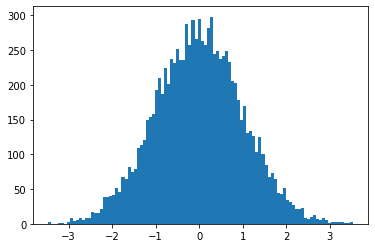

In [30]:
samples=10000
s=np.random.normal(mu, sigma, samples)  #生成正态分布随机数
plt.hist(s, bins=100)
plt.show()

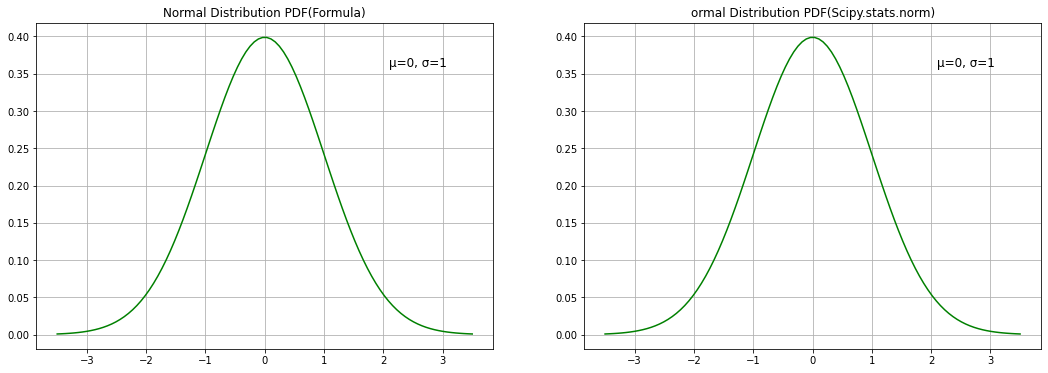

In [31]:
x=np.linspace(mu-3.5*sigma, mu+3.5*sigma, 100)
y1=np.exp(-(x-mu)**2/(2*sigma**2))/(math.sqrt(2*math.pi)*sigma)  #正态分布的概率密度函数
y2=stats.norm.pdf(x, mu, sigma)  #Scipy的正态分布函数
fig=plt.figure(figsize=(18,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(x, y1, c="green")
ax1.set_title("Normal Distribution PDF(Formula)")
ax1.text(2.1, 0.36, "μ=0, σ=1", size=12)
ax2.plot(x, y2, c="green")
ax2.set_title("Normal Distribution PDF(Scipy.stats.norm)")
ax2.text(2.1, 0.36, "μ=0, σ=1", size=12)
ax1.set_xlim((-4, 4))
ax2.set_xlim((-4, 4))
ax1.set_ylim((0, 0.5))
ax2.set_ylim((0, 0.5))
ax1.grid(True)
ax2.grid(True)
plt.show()

## 例题1 z分数

某学校的考试成绩服从正态分布，均值为81，标准差为6.3。计算以下成绩的z分数。

65，83，93，100

In [27]:
mu=81
simga=6.3
score=[65, 83, 93, 100]
for i in range(len(score)):
    zscore=(score[i]-mu)/simga
    print(str(score[i])+"的z-score："+str(round(zscore, 2)))

65的z-score：-2.54
83的z-score：0.32
93的z-score：1.9
100的z-score：3.02


## 例题2

美国1岁女孩的体重服从正态分布，均值为9.5kg，标准差为1.1kg，不使用计算器，估算以下情况的百分比概率

1、体重在8.4kg以下
2、体重在7.3～11.7kg之间
3、体重在12.8kg以上

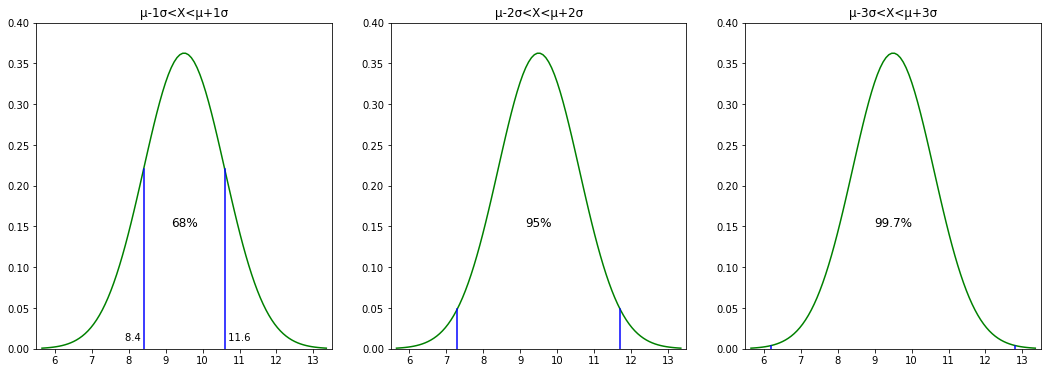

In [56]:
mu=9.5
sigma=1.1
x=np.linspace(mu-3.5*sigma, mu+3.5*sigma, 100)
y=stats.norm.pdf(x, mu, sigma)  #Scipy的正态分布函数
fig=plt.figure(figsize=(18,6))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.plot(x, y, c="green")
ax1.set_title("μ-1σ<X<μ+1σ")
ax1.text(9.5, 0.15, "68%", size=12, horizontalalignment='center')
ax1.text(8.4, 0.01, "8.4 ", horizontalalignment='right')
ax1.text(10.6, 0.01, " 11.6")
ax1.plot([8.4, 8.4], [0, stats.norm.pdf(8.4, mu, sigma)], c="blue")
ax1.plot([10.6, 10.6], [0, stats.norm.pdf(10.6, mu, sigma)], c="blue")
ax2.plot(x, y, c="green")
ax2.set_title("μ-2σ<X<μ+2σ")
ax2.text(9.5, 0.15, "95%", size=12, horizontalalignment='center')
ax2.plot([7.3, 7.3], [0, stats.norm.pdf(7.3, mu, sigma)], c="blue")
ax2.plot([11.7, 11.7], [0, stats.norm.pdf(11.7, mu, sigma)], c="blue")
ax3.plot(x, y, c="green")
ax3.set_title("μ-3σ<X<μ+3σ")
ax3.text(9.5, 0.15, "99.7%", size=12, horizontalalignment='center')
ax3.plot([6.2, 6.2], [0, stats.norm.pdf(6.2, mu, sigma)], c="blue")
ax3.plot([12.8, 12.8], [0, stats.norm.pdf(12.8, mu, sigma)], c="blue")
ax1.set_xlim((5.5, 13.5))
ax2.set_xlim((5.5, 13.5))
ax3.set_xlim((5.5, 13.5))
ax1.set_ylim((0, 0.4))
ax2.set_ylim((0, 0.4))
ax3.set_ylim((0, 0.4))
plt.show()

In [55]:
ep1, ep2, ep3=0.68, 0.95, 0.997  #根据经验法则
p1=(1-ep1)/2
print("体重在8.4kg以下的概率："+str(round(p1,4)*100)+"%")
p2=ep2
print("体重在7.3～11.7kg之间的概率："+str(round(p2,4)*100)+"%")
p3=(1-ep3)/2
print("体重在12.8kg以的概率："+str(round(p3,4)*100)+"%")

体重在8.4kg以下的概率：16.0%
体重在7.3～11.7kg之间的概率：95.0%
体重在12.8kg以的概率：0.15%


## 例题3

5年级男生的身高近似服从正态分布，均值为143.5cm，标准差为7.1cm，随机抽取1名男生，身高超过157.7cm的概率是多少？

In [58]:
mu=143.5
sigma=7.1
zscore=(157.7-mu)/sigma
print("157.7的z-score="+str(round(zscore,2)))

157.7的z-score=2.0


In [61]:
# 根据经验法则，均值左右2个标准差之内概率为95%，大于均值加2个标准差的概率为
p=(1-0.95)/2
print("随机抽取1名男生，身高超过157.7cm的概率p="+str(round(p, 3)))

随机抽取1名男生，身高超过157.7cm的概率p=0.025
